In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/seattle-weather.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [4]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [5]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [6]:
df.duplicated().sum()


0

In [7]:
df[df['temp_min']==min(df.temp_min)]

,date,precipitation,temp_max,temp_min,wind,weather
706,2013-12-07,0.0,0.0,-7.1,3.1,sun


In [8]:
df[df['temp_max']==max(df.temp_max)]

,date,precipitation,temp_max,temp_min,wind,weather
953,2014-08-11,0.5,35.6,17.8,2.6,rain


<Axes: xlabel='temp_max', ylabel='Count'>

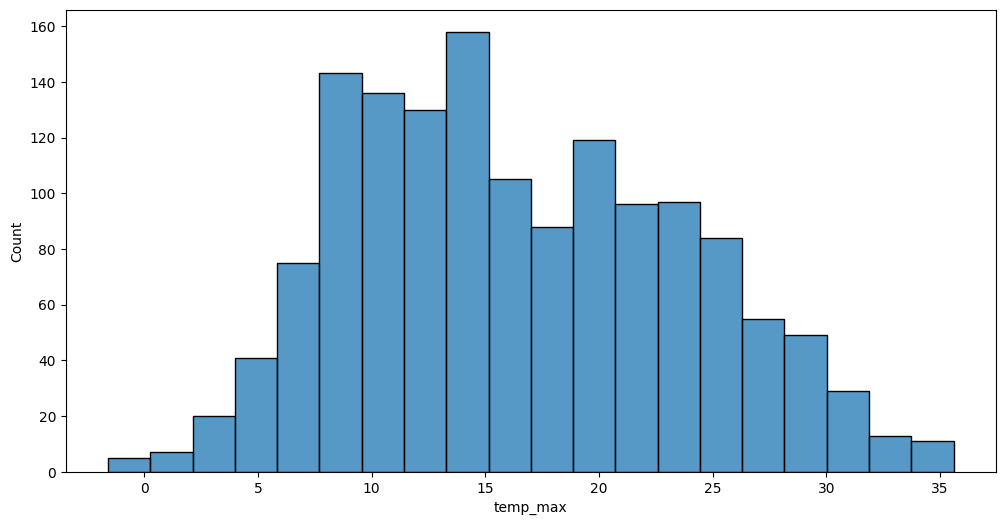

In [9]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x=df.temp_max,bins=20)

<Axes: xlabel='temp_min', ylabel='Count'>

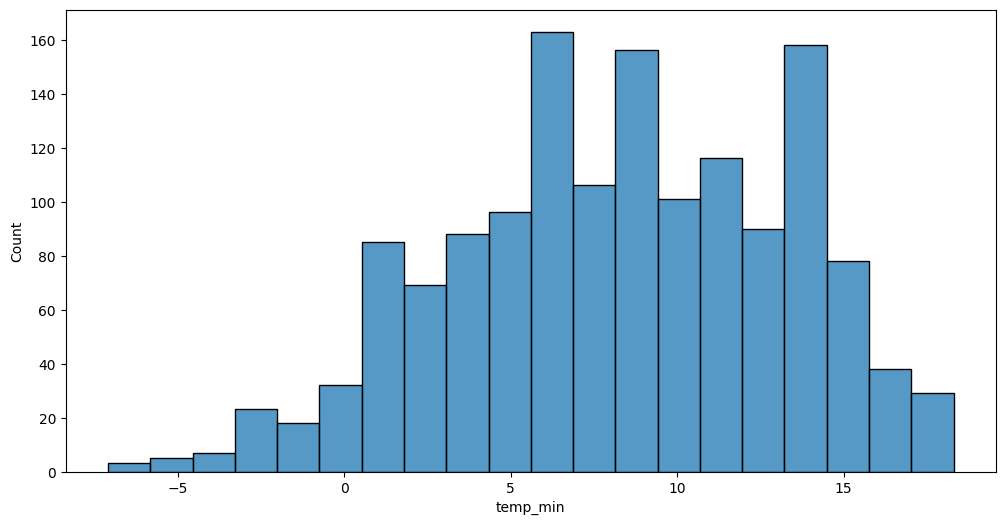

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x=df.temp_min,bins=20)

In [11]:
df.loc[:,['date','temp_max']]
df['date'] = pd.to_datetime(df['date'])

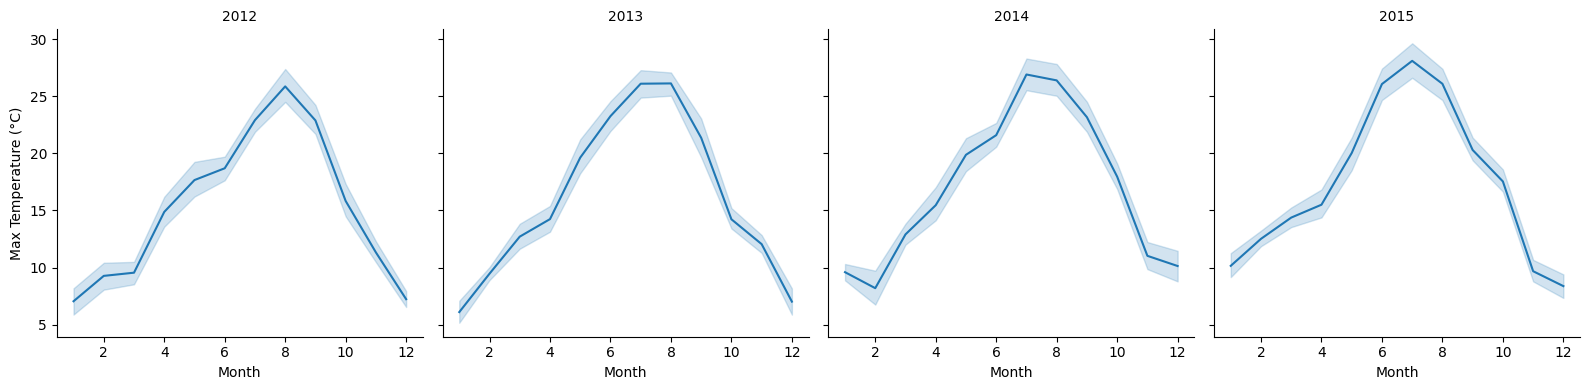

In [12]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_max')
g.set_axis_labels('Month', 'Max Temperature (°C)')
g.set_titles(col_template="{col_name}")
plt.show()

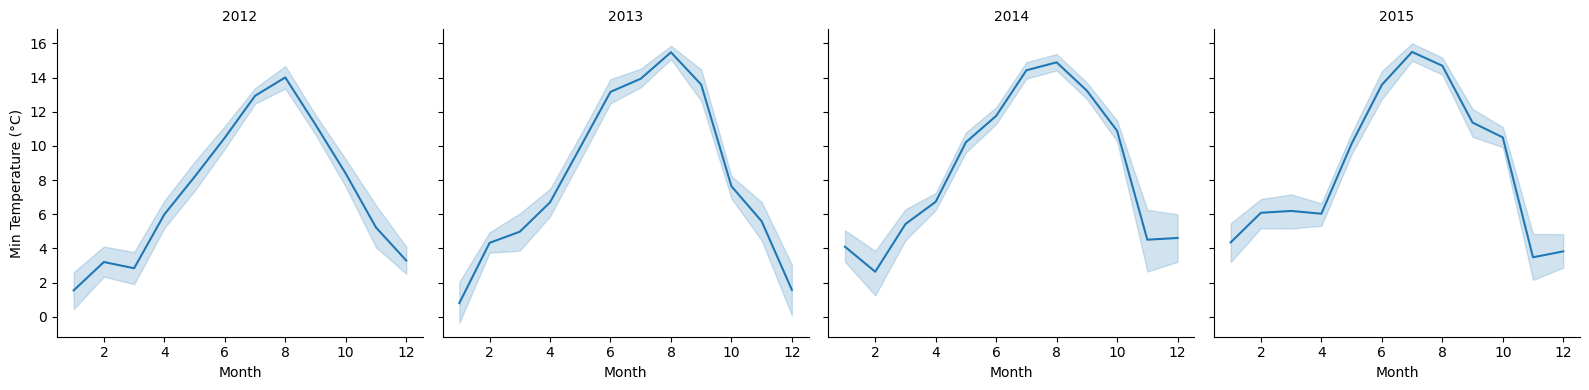

In [13]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_min')
g.set_axis_labels('Month', 'Min Temperature (°C)')
g.set_titles(col_template="{col_name}")
plt.show()

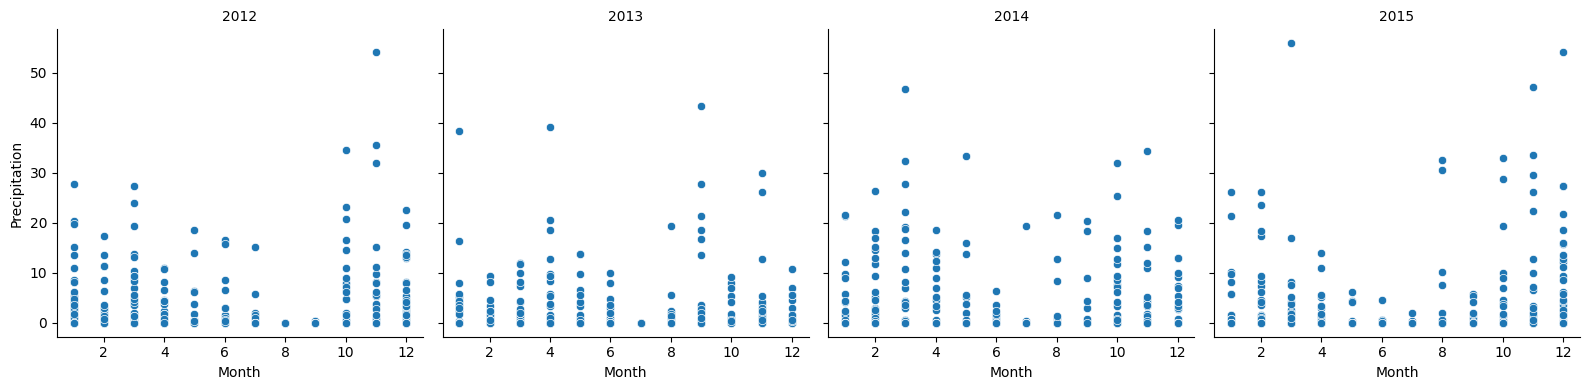

In [14]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.scatterplot, 'month', 'precipitation')
g.set_axis_labels('Month', 'Precipitation')
g.set_titles(col_template="{col_name}")
plt.show()

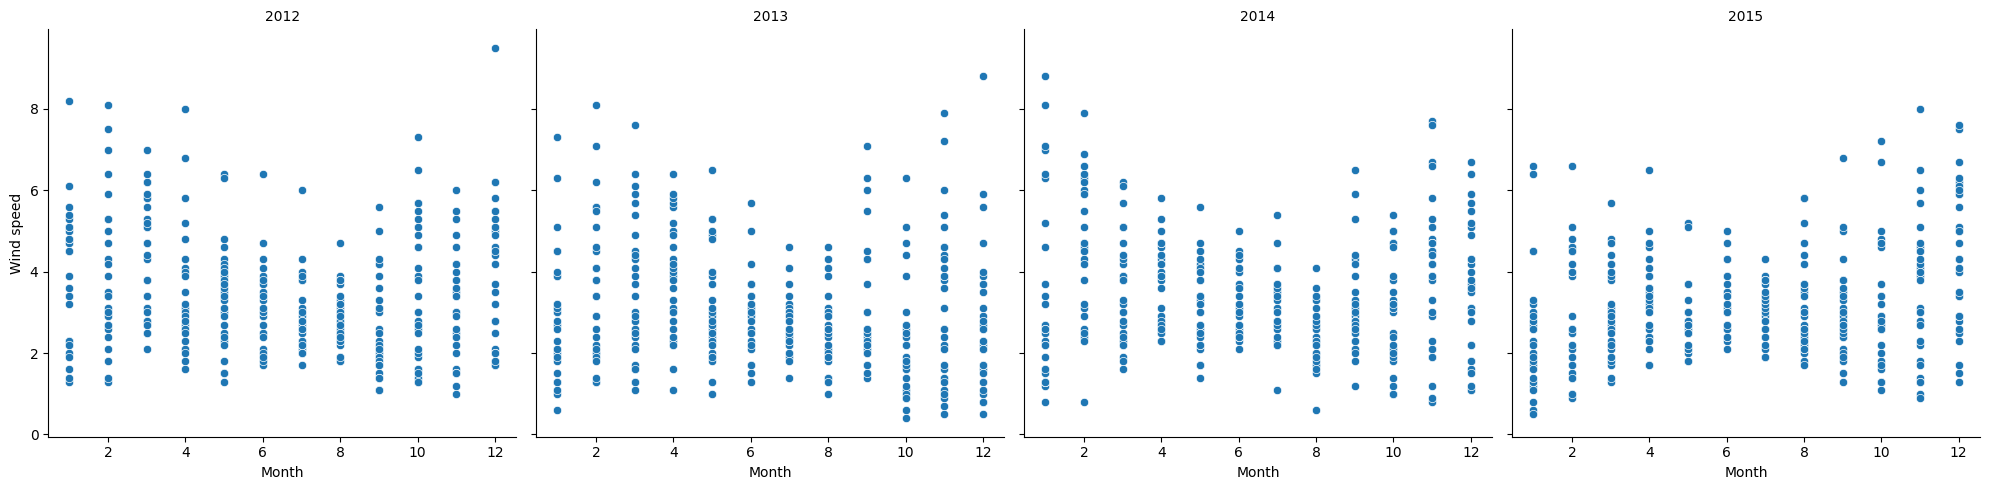

In [15]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=5)
g.map(sns.scatterplot, 'month', 'wind')
g.set_axis_labels('Month', 'Wind speed')
g.set_titles(col_template="{col_name}")
plt.show()



In [16]:
df.weather.value_counts()


rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

<Axes: xlabel='weather', ylabel='count'>

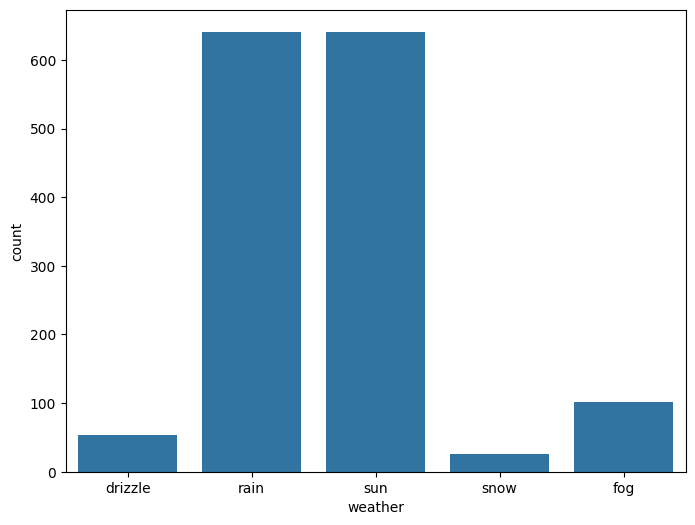

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x=df.weather)

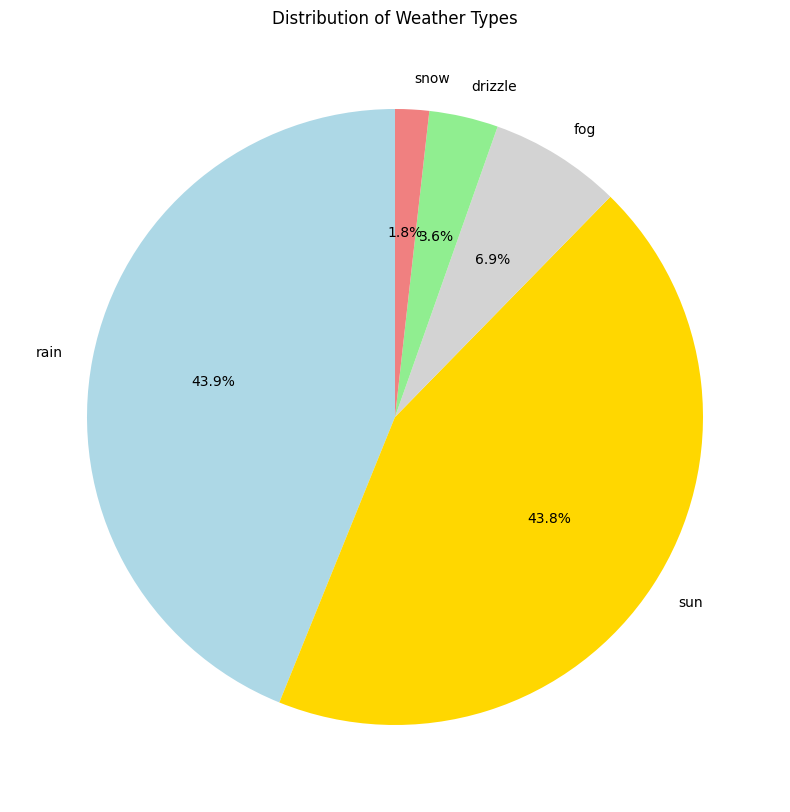

In [18]:
x=df.weather.value_counts()
plt.figure(figsize=(12, 10))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'gold', 'lightgray', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Weather Types')
plt.show()

In [19]:
df.drop('month',axis=1,inplace=True)
df.drop('year',axis=1,inplace=True)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['weather']=le.fit_transform(df['weather'])

In [22]:
x = df[['temp_min', 'temp_max', 'precipitation', 'wind']]
y=df['weather']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)


print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


In [23]:
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Confusion Matrix:
[[  0   0   0   0   9]
 [  1   0   0   0  24]
 [  0   0 109   3   8]
 [  0   0   4   4   0]
 [  1   0   0   0 130]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       1.00      0.00      0.00        25
           2       0.96      0.91      0.94       120
           3       0.57      0.50      0.53         8
           4       0.76      0.99      0.86       131

    accuracy                           0.83       293
   macro avg       0.66      0.48      0.47       293
weighted avg       0.84      0.83      0.78       293

